<a href="https://colab.research.google.com/github/haridevmg/Data-structures-and-algorithms/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [15]:
#  LOAD AND SPLIT DATASET
(X_train,y_train), (X_test,y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

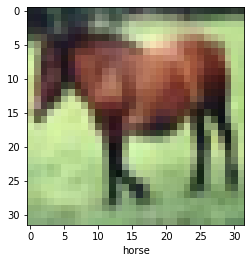

In [16]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(X_train[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[y_train[IMG_INDEX][0]])
plt.show()

In [17]:
bot = models.Sequential([

    layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((3,3)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax"),

])

In [18]:
bot.compile(

    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]

)

history=bot.fit(X_train,y_train,epochs=4,validation_data=(X_test,y_test))

Epoch 1/4


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 63s 40ms/step - loss: 1.4937 - accuracy: 0.4617 - val_loss: 1.2210 - val_accuracy: 0.5721
Epoch 2/4
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1378 - accuracy: 0.5998 - val_loss: 1.0926 - val_accuracy: 0.6126
Epoch 3/4
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0013 - accuracy: 0.6502 - val_loss: 1.0071 - val_accuracy: 0.6513
Epoch 4/4
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9169 - accuracy: 0.6804 - val_loss: 0.9661 - val_accuracy: 0.6647


In [19]:
print(history)

In [20]:
pred=bot.predict(X_test)

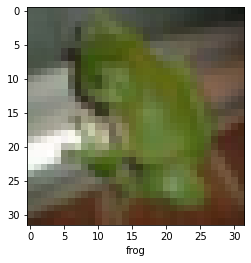

frog


In [21]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(X_test[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[y_test[IMG_INDEX][0]])
plt.show()

print(class_names[np.argmax(pred[IMG_INDEX])])